# hand written digit recognision on mnist dataset using knn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# step 1:- Data Preperation

In [6]:
df = pd.read_csv('mnist_train.csv')
print(df.shape)

(42000, 785)


In [7]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [8]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data =df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [10]:
x = data[:,1:]
y = data[:,0]
print(x.shape,y.shape)

(42000, 784) (42000,)


In [13]:
split = int(0.8*x.shape[0])
print(split)

x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


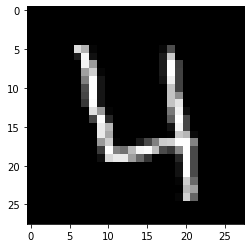

In [27]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawImg(x_train[3])

# Step 2 :- K-NN

In [28]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,queryPoint,k=5):
    vals = []
    m = x.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,x[i])
        vals.append((d,y[i]))
    vals = sorted(vals)
    
    vals = vals[:k]
    vals = np.array(vals)
#     print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts = True)
#     print(new_vals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

# Step 3 :- Make predictions

In [34]:
pred = knn(x_train,y_train,x_test[1])
print(int(pred))

7


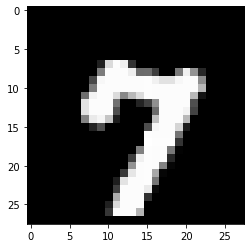

7


In [35]:
drawImg(x_test[1])
print(y_test[1])

# write one method to compute accuracy of KNN over the test set

In [ ]:
c=0
for i in range(len(x_test)):
    if(int(knn(x_train,y_train,x_test[i]))==y_test[i]):
        c+=1
accuracy = c*100/len(x_test)
print(accuracy)